# $N^2$-Queens — MCMC



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plot import plot_energy_curve, plot_energy_curve_average, compare_annealing_effect, min_energy_vs_N, plot_min_energy_vs_N
from utility import random_state, get_positions, queens_attack, compute_energy, compute_delta_energy
from mcmc import MCMC_result, metropolis_step_single, run_mcmc, average_energy_over_runs


plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.grid'] = True


- Each column (i, j) stores a height in [0, N), so the state is an integer N x N matrix.
- change height in a random entry

## MCMC without annealing

step 5000: energy=198, beta=1.250, acceptance=14.6%
step 10000: energy=202, beta=1.250, acceptance=14.1%
step 15000: energy=188, beta=1.250, acceptance=13.4%
step 20000: energy=205, beta=1.250, acceptance=12.9%
step 25000: energy=187, beta=1.250, acceptance=12.8%
step 30000: energy=175, beta=1.250, acceptance=12.2%
step 35000: energy=185, beta=1.250, acceptance=11.8%
step 40000: energy=178, beta=1.250, acceptance=11.7%
step 45000: energy=189, beta=1.250, acceptance=11.7%
step 50000: energy=197, beta=1.250, acceptance=11.6%
step 55000: energy=184, beta=1.250, acceptance=11.6%
step 60000: energy=169, beta=1.250, acceptance=11.5%
step 65000: energy=194, beta=1.250, acceptance=11.5%
step 70000: energy=190, beta=1.250, acceptance=11.5%
step 75000: energy=209, beta=1.250, acceptance=11.5%
step 80000: energy=184, beta=1.250, acceptance=11.5%
step 85000: energy=193, beta=1.250, acceptance=11.5%
step 90000: energy=178, beta=1.250, acceptance=11.5%
step 95000: energy=185, beta=1.250, acceptance=

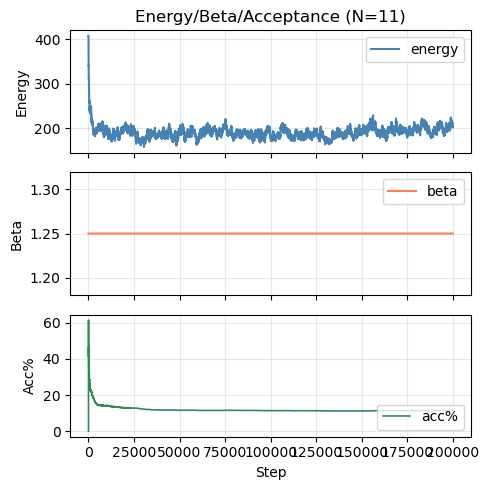

In [2]:
trace = run_mcmc(N=11, beta=1.25, max_steps=200000, verbose=True, schedule="fixed", seed=123)
plot_energy_curve(trace)

N=11, schedule=fixed:   0%|          | 0/3 [00:00<?, ?it/s]

N=11, num_zero_runs=0, final_energies=[204, 214, 168]


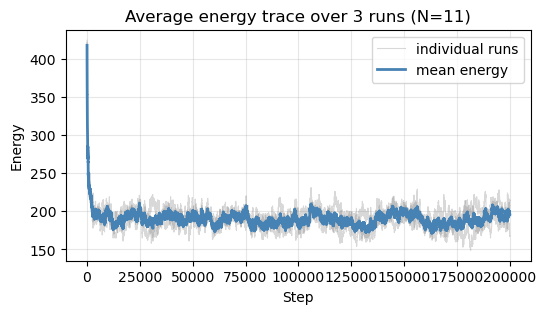

In [3]:
result = average_energy_over_runs(N=11, beta=1.25, max_steps=200000, runs=3, base_seed=123)
plot_energy_curve_average(*result)

## MCMC with annealing

step 5000: energy=216, beta=1.010, acceptance=19.9%
step 10000: energy=236, beta=1.020, acceptance=18.8%
step 15000: energy=223, beta=1.031, acceptance=19.2%
step 20000: energy=217, beta=1.041, acceptance=18.7%
step 25000: energy=214, beta=1.052, acceptance=18.4%
step 30000: energy=221, beta=1.063, acceptance=18.0%
step 35000: energy=238, beta=1.074, acceptance=18.1%
step 40000: energy=208, beta=1.084, acceptance=18.0%
step 45000: energy=196, beta=1.096, acceptance=17.8%
step 50000: energy=218, beta=1.107, acceptance=17.5%
step 55000: energy=175, beta=1.118, acceptance=17.2%
step 60000: energy=199, beta=1.129, acceptance=16.9%
step 65000: energy=185, beta=1.141, acceptance=16.7%
step 70000: energy=200, beta=1.152, acceptance=16.6%
step 75000: energy=196, beta=1.164, acceptance=16.5%
step 80000: energy=195, beta=1.176, acceptance=16.2%
step 85000: energy=194, beta=1.188, acceptance=15.9%
step 90000: energy=175, beta=1.200, acceptance=15.8%
step 95000: energy=194, beta=1.212, acceptance=

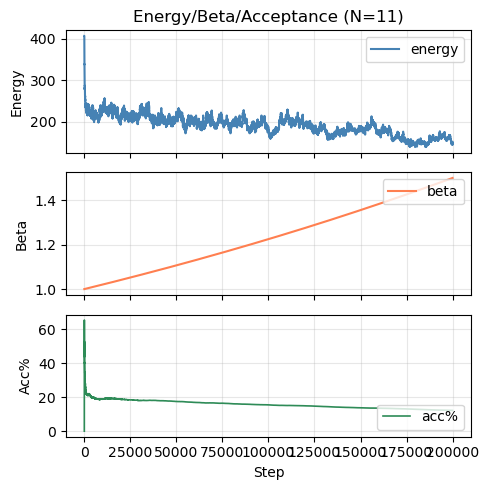

In [9]:
trace = run_mcmc(N=11, beta=1.0, beta_end=1.5, max_steps=200000, verbose=True, schedule="geometric", seed=123)
plot_energy_curve(trace)

N=11, schedule=geometric:   0%|          | 0/3 [00:00<?, ?it/s]

N=11, num_zero_runs=1, final_energies=[146, 0, 150]


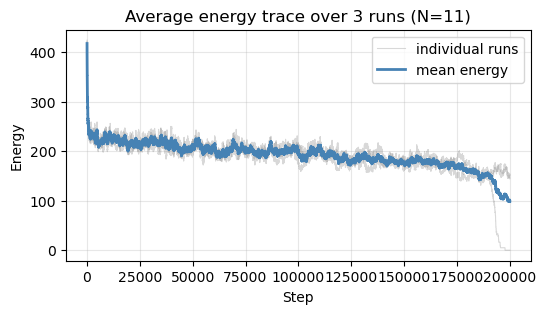

In [10]:
result = average_energy_over_runs(N=11, beta=1.0, beta_end=1.5, max_steps=200000, runs=3, base_seed=123, schedule="geometric", cooling_rate=1.001)
plot_energy_curve_average(*result)

## Comparing the effect of annealing

N=11, schedule=fixed:   0%|          | 0/5 [00:00<?, ?it/s]

N=11, num_zero_runs=1, final_energies=[204, 214, 168, 23, 0]


N=11, schedule=geometric:   0%|          | 0/5 [00:00<?, ?it/s]

N=11, num_zero_runs=3, final_energies=[146, 0, 150, 0, 0]


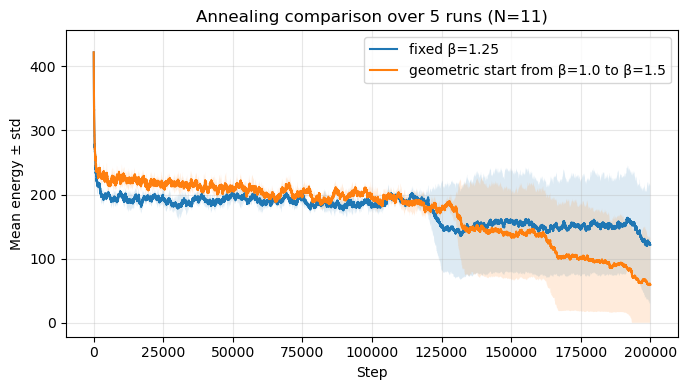

In [11]:
compare_annealing_effect(N=11, beta_fix=1.25, beta_annealing_start=1.0, beta_annealing_end=1.5, max_steps=200000, runs=5, base_seed=123, cooling_rate=1.001)

## Minimal energy vs. board size (annealing)

Use the simulated annealing routine for a sweep of N values and log the smallest energy observed. Larger N typically demand more annealing steps or repeated runs before the curve stabilizes.

Processing N values:   0%|          | 0/11 [00:00<?, ?it/s]

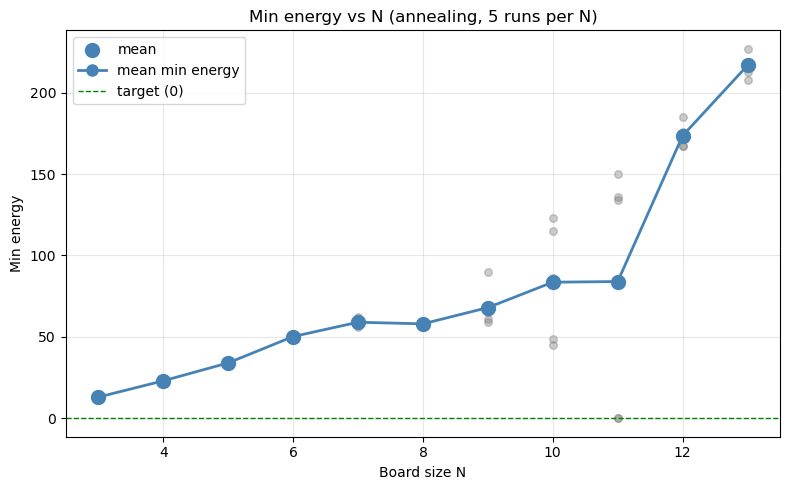

In [12]:
N_values = np.arange(3, 14)
result = min_energy_vs_N(N_values, beta=1.0, beta_end=1.5, max_steps=200000, runs=5, schedule="geometric", cooling_rate=1.001, target_energy=0, base_seed=123)
plot_min_energy_vs_N(result)

## Optimal Solution illustration

In [13]:
def latin_queen_construction(N):
    a, b = 3, 5
    state = np.zeros((N, N), dtype=int)
    for i in range(N):
        for j in range(N):
            state[i, j] = (a * i + b * j) % N 
    return state

In [14]:
N = 13
state = latin_queen_construction(N)
print(state)
print("energy of Latin-queen construction:", compute_energy(state))

[[ 0  5 10  2  7 12  4  9  1  6 11  3  8]
 [ 3  8  0  5 10  2  7 12  4  9  1  6 11]
 [ 6 11  3  8  0  5 10  2  7 12  4  9  1]
 [ 9  1  6 11  3  8  0  5 10  2  7 12  4]
 [12  4  9  1  6 11  3  8  0  5 10  2  7]
 [ 2  7 12  4  9  1  6 11  3  8  0  5 10]
 [ 5 10  2  7 12  4  9  1  6 11  3  8  0]
 [ 8  0  5 10  2  7 12  4  9  1  6 11  3]
 [11  3  8  0  5 10  2  7 12  4  9  1  6]
 [ 1  6 11  3  8  0  5 10  2  7 12  4  9]
 [ 4  9  1  6 11  3  8  0  5 10  2  7 12]
 [ 7 12  4  9  1  6 11  3  8  0  5 10  2]
 [10  2  7 12  4  9  1  6 11  3  8  0  5]]
energy of Latin-queen construction: 0
